In [109]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from scipy import stats
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_samples, silhouette_score




# Phase 2

In [110]:
merged_df = pd.read_csv('merged_df.csv')
merged_df

,App Name,App Id,Rating Count,Minimum Installs,Currency,Minimum Android,Developer Id,Developer Website,Developer Email,Released,...,Price,Rating,Installs,Size,Content Rating,Reviews,Popularity,User Engagement,Performance,Life time
0,Montessori Preschool,com.edokicademy.montessoriacademy,3.219000e+03,1000000.0,USD,5,9.02e+18,http://www.edokiacademy.com,support@edokiacademy.com,3-Jul-17,...,0.00000,3.902012,550000.0,4.450000e+07,Everyone,1086.5,False,3.122382e+00,2.601118,5.0
1,ABC Kids - Tracing & Phonics,com.rvappstudios.abc_kids_toddler_tracing_phonics,6.251800e+04,10000000.0,USD,4.4,7.43e+18,http://www.rvappstudios.com,app_support@rvappstudios.com,3-Mar-16,...,0.00000,4.391502,10000000.0,2.464008e+07,Everyone,27501.5,False,3.527504e+00,2.782048,5.0
2,Puzzle Kids - Animals Shapes and Jigsaw Puzzles,com.rvappstudios.jigsaw.puzzles.kids,1.479700e+04,10000000.0,USD,4.4,7.43e+18,http://www.rvappstudios.com,app_support@rvappstudios.com,28-Jun-17,...,0.00000,4.398525,5500000.0,5.050000e+07,Everyone,2937.5,False,3.526257e+00,2.935696,5.0
3,Learn to Read with Tommy Turtle,com.intellijoy.android.reading.free,2.176200e+04,5000000.0,USD,4.4,6.7e+18,http://www.intellijoy.com,questions@intellijoy.com,20-Jun-11,...,0.00000,4.144531,5000000.0,2.464008e+07,Everyone,12195.5,False,3.322721e+00,2.632199,5.0
4,Learn to Read with Tommy Turtle,com.intellijoy.android.reading,1.172000e+03,100000.0,USD,4.4,6.7e+18,http://www.intellijoy.com,questions@intellijoy.com,9-May-11,...,0.37354,4.145299,2550000.0,2.464008e+07,Everyone,10589.5,False,3.320012e+00,2.631843,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,350 Diy Room Decor Ideas,com.diy_room_decor.dev3,1.010000e+02,50000.0,USD,4.1,Home+Design+Solutions,https://www.hargaponsel.net/,developer.tiga@gmail.com,7-Nov-17,...,0.00000,4.055000,30000.0,2.000000e+07,Everyone,38.0,False,3.244041e+00,2.849742,4.5
6246,Doll House Design & Decoration 2: Girls House ...,com.sablo.dollhouse.design2,7.149000e+03,1000000.0,USD,4.1,Sablo+Games,http://sablostudio.com/,sablogamez@gmail.com,5-Jan-18,...,0.00000,3.838812,550000.0,4.500000e+07,Everyone,3259.0,False,3.071898e+00,3.466117,3.5
6247,ES-1,com.dygsm.es1,1.179461e+06,500.0,USD,4.1,alarm+system,http://www.gsm24-ekb.ru,ekb-gsm@yandex.ru,11-Apr-19,...,0.00000,4.033133,500.0,4.000000e+06,Everyone,3.0,False,7.656648e-07,0.623346,4.0
6248,Binaural Beats Meditation,com.app.binaural_wavess,7.000000e+01,100000.0,USD,4.0.3,Selfhealing+MediApps,unknown,sionovliorDeveloper@gmail.com,18-May-16,...,0.00000,4.307143,75000.0,2.464008e+07,Everyone,227.0,False,3.445822e+00,3.444622,4.5


### Preprocess

In [111]:
tmp_merged_df = pd.DataFrame()
for col in ['Released', 'Last update']:
    tmp_merged_df[col] = pd.to_datetime(merged_df[col], errors='coerce')
    tmp_merged_df[col] = tmp_merged_df[col].dt.year
    mean_year = int(tmp_merged_df[col].mean())
    tmp_merged_df[col].fillna(mean_year, inplace=True)
    merged_df[col] = tmp_merged_df[col]
    
## Released & Last update 0-100
norm_released = ((tmp_merged_df['Released'] - tmp_merged_df['Released'].min()) / (tmp_merged_df['Released'].max() - tmp_merged_df['Released'].min())) * 100
norm_last_update = ((tmp_merged_df['Last update'] - tmp_merged_df['Last update'].min()) / (tmp_merged_df['Last update'].max() - tmp_merged_df['Last update'].min())) * 100

## Rating 0-1
norm_ratings = ((merged_df['Rating'] - merged_df['Rating'].min()) / (merged_df['Rating'].max() - merged_df['Rating'].min()))

## Rating Count 0-100
norm_rating_count = ((merged_df['Rating Count'] - merged_df['Rating Count'].min()) / (merged_df['Rating Count'].max() - merged_df['Rating Count'].min())) * 100

## Minimum Installs 0-100
norm_minimum_installs = ((merged_df['Minimum Installs'] - merged_df['Minimum Installs'].min()) / (merged_df['Minimum Installs'].max() - merged_df['Minimum Installs'].min())) * 100

## Installs 0-100
norm_installs= ((merged_df['Installs'] - merged_df['Installs'].min()) / (merged_df['Installs'].max() - merged_df['Installs'].min())) * 100

## Reviews 0-100
norm_reviews = ((merged_df['Reviews'] - merged_df['Reviews'].min()) / (merged_df['Reviews'].max() - merged_df['Reviews'].min())) * 100

## Size 0-100
norm_size = ((merged_df['Size'] - merged_df['Size'].min()) / (merged_df['Size'].max() - merged_df['Size'].min())) * 100

## Price 0-100
norm_price = ((merged_df['Price'] - merged_df['Price'].min()) / (merged_df['Price'].max() - merged_df['Price'].min())) * 100

bins = [0, 2, 4, 5]
labels = ['low', 'medium', 'high']
categorical_rating = pd.cut(merged_df['Rating'], bins=bins, labels=labels)
tmp_merged_df['Rating'] = categorical_rating

bins = [0, 30, 70, 100]
tmp_merged_df['Minimum Installs'] = pd.cut(norm_minimum_installs, bins=bins, labels=labels)
 
size_labels = ['small', 'medium', 'large']
tmp_merged_df['Size'] = pd.cut(norm_size, bins=bins, labels=size_labels)

tmp_merged_df['Installs'] = pd.cut(norm_installs, bins=bins, labels=labels)

tmp_merged_df['Reviews'] = pd.cut(norm_reviews, bins=bins, labels=labels)

tmp_merged_df['Price'] = pd.cut(norm_price, bins=bins, labels=labels)

tmp_merged_df['Rating Count'] = pd.cut(norm_rating_count, bins=bins, labels=labels)

labels = ['old', 'moderate', 'recent']
tmp_merged_df['Released'] = pd.cut(norm_released, bins=bins, labels=labels)
tmp_merged_df['Last update'] = pd.cut(norm_last_update, bins=bins, labels=labels)



C:\Users\mashadservice\AppData\Local\Temp\ipykernel_16328\1119628359.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tmp_merged_df[col] = pd.to_datetime(merged_df[col], errors='coerce')
c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\mashadservice\AppData\Local\Temp\ipykernel_16328\1119628359.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tmp_merged_df[col] = pd.to_datet

### Part 1 - Extracting Frequent Patterns

In [112]:
tmp_merged_df[['Genres', 'Type', 'In app purchases', 'Ad Supported', 'Editor Choice']] = merged_df[['Genres', 'Type', 'In app purchases', 'Ad Supported', 'Editor Choice']]

tmp_merged_df = pd.get_dummies(tmp_merged_df[['Genres','Rating Count', 'Minimum Installs', 'Last update', 'Released','In app purchases', 'Ad Supported',
                                       'Editor Choice', 'Price', 'Rating', 'Installs', 'Size', 'Reviews', 'Type']])

In [113]:
tmp_merged_df

,In app purchases,Ad Supported,Editor Choice,Genres_Action,Genres_Action;Action & Adventure,Genres_Adventure,Genres_Adventure;Action & Adventure,Genres_Adventure;Brain Games,Genres_Adventure;Education,Genres_Arcade,...,Installs_medium,Installs_high,Size_small,Size_medium,Size_large,Reviews_low,Reviews_medium,Reviews_high,Type_Free,Type_Paid
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
6246,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False
6247,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
6248,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False


In [114]:
frequent_itemsets = apriori(tmp_merged_df, min_support=0.75, use_colnames=True)
frequent_itemsets

,support,itemsets
0,1.00000,(Ad Supported)
1,0.75920,(Rating Count_low)
2,0.87472,(Minimum Installs_low)
3,0.80640,(Last update_recent)
4,0.83904,(Rating_high)
5,0.83760,(Installs_low)
6,0.79568,(Reviews_low)
7,0.93056,(Type_Free)
8,0.75920,"(Rating Count_low, Ad Supported)"
9,0.87472,"(Minimum Installs_low, Ad Supported)"


In [115]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)
rules = rules.sort_values(by='lift', ascending=False)
for idx, rule in rules.iterrows():
    antecedents = ', '.join(rule['antecedents'])
    consequents = ', '.join(rule['consequents'])
    print(f"Rule: {antecedents} -> {consequents}")
    print(f"Support: {rule['support']:.4f}")
    print(f"Confidence: {rule['confidence']:.4f}")
    print(f"Lift: {rule['lift']:.4f}")
    print('-' * 30)

Rule: Installs_low -> Minimum Installs_low, Ad Supported, Reviews_low
Support: 0.7685
Confidence: 0.9175
Lift: 1.1816
------------------------------
Rule: Installs_low -> Minimum Installs_low, Reviews_low
Support: 0.7685
Confidence: 0.9175
Lift: 1.1816
------------------------------
Rule: Minimum Installs_low, Reviews_low -> Installs_low
Support: 0.7685
Confidence: 0.9897
Lift: 1.1816
------------------------------
Rule: Minimum Installs_low, Ad Supported, Reviews_low -> Installs_low
Support: 0.7685
Confidence: 0.9897
Lift: 1.1816
------------------------------
Rule: Installs_low, Ad Supported -> Minimum Installs_low, Reviews_low
Support: 0.7685
Confidence: 0.9175
Lift: 1.1816
------------------------------
Rule: Minimum Installs_low, Reviews_low -> Installs_low, Ad Supported
Support: 0.7685
Confidence: 0.9897
Lift: 1.1816
------------------------------
Rule: Installs_low -> Reviews_low
Support: 0.7688
Confidence: 0.9179
Lift: 1.1536
------------------------------
Rule: Ad Supported, R

c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [116]:
del tmp_merged_df

### Part 2 - Clustering

In [117]:
tmp_merged_df = pd.DataFrame()
tmp_merged_df = merged_df.loc[:, ['Rating Count', 'Last update', 'Rating', 'Released', 'Price', 'Installs', 'Size', 'Reviews']].copy()
tmp_merged_df['Type'] = merged_df['Type'].map({'Free': 0, 'Paid': 1})
tmp_merged_df[['In app purchases']] = merged_df[['In app purchases']].astype(int)

c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/dev

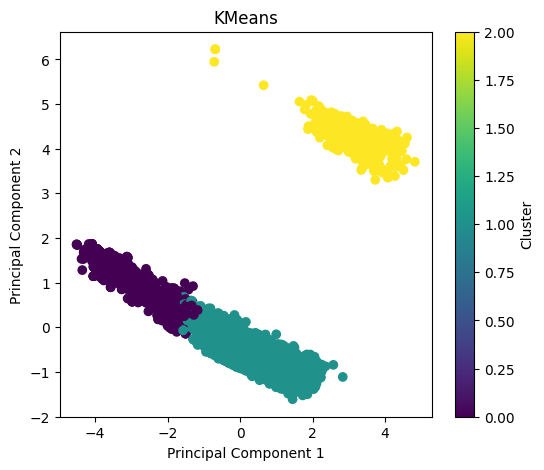

In [118]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(tmp_merged_df)

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_scaled)

cluster_labels = kmeans.labels_
tmp_merged_df['Cluster'] = cluster_labels

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('KMeans')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

tmp_merged_df.to_csv('kmeans_clustered_data.csv', index=False)


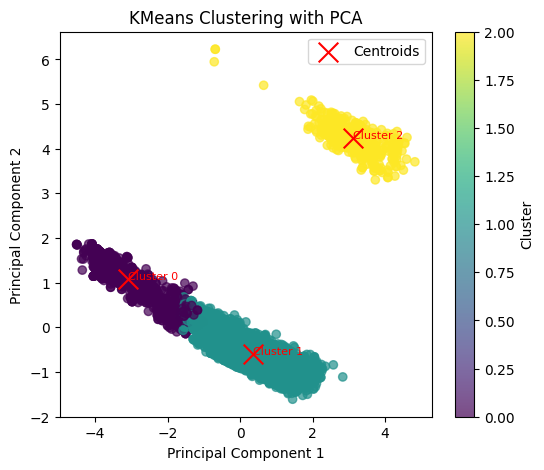

In [119]:
plt.figure(figsize=(6, 5))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.7)

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=200, c='red', label='Centroids')

# Adding annotations
for i, centroid in enumerate(centroids_pca):
    plt.annotate(f'Cluster {i}', (centroid[0], centroid[1]), fontsize=8, color='red')

plt.title('KMeans Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.show()


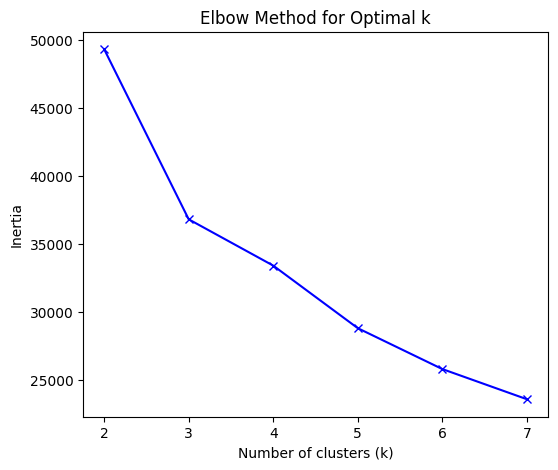

In [120]:
inertia = []
K = range(2, 8)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Cluster Profiling:
|   Cluster |   Rating Count |   Last update |   Rating |   Released |   Price |         Installs |        Size |   Reviews |   Type |   In app purchases |
|----------:|---------------:|--------------:|---------:|-----------:|--------:|-----------------:|------------:|----------:|-------:|-------------------:|
|         0 |       931546   |       2020.45 |  4.32106 |    2014.24 | 0       |      3.64239e+07 | 2.50612e+07 |  487557   |      0 |           0.615927 |
|         1 |       151497   |       2019.54 |  4.21624 |    2015.68 | 0       |      4.23796e+06 | 1.88234e+07 |   49614.6 |      0 |           0.310116 |
|         2 |        96153.1 |       2018.96 |  4.22921 |    2014.42 | 0.37354 | 698896           | 1.65525e+07 |   14360.3 |      1 |           0.205069 |


c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Feature Importance:
            Feature  Importance
7           Reviews    0.318216
5          Installs    0.226773
4             Price    0.165458
8              Type    0.146124
0      Rating Count    0.092483
2            Rating    0.016036
6              Size    0.010309
3          Released    0.008775
1       Last update    0.007963
9  In app purchases    0.007863


C:\Users\mashadservice\AppData\Local\Temp\ipykernel_16328\3052466983.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/

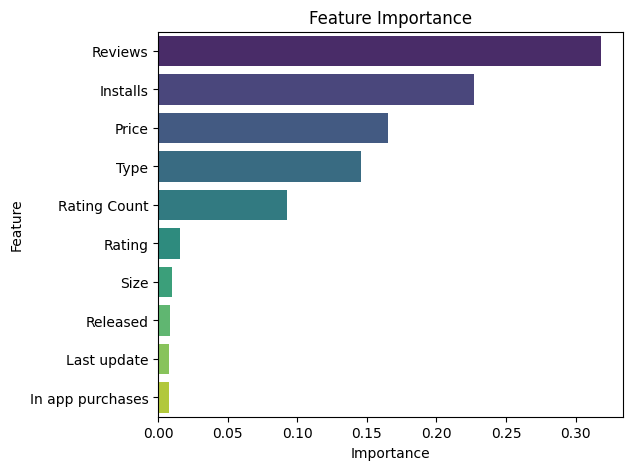

c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Silhouette Score (Overall): 0.07


c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\mashadservice\AppData\Local\Temp\ipykernel_16328\3052466983.py:44: RuntimeWarning: Mean of empty slice.
  cluster_avg_silhouette = ith_cluster_silhouette_values.mean()
c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


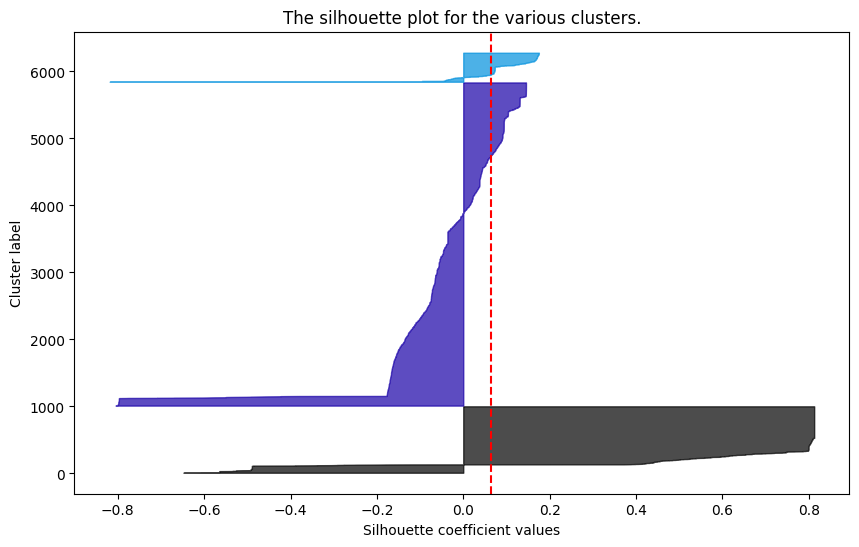

Average Silhouette Scores for each cluster:
Cluster 0: 0.60
Cluster 1: -0.05
Cluster 2: 0.09
Cluster 3: nan
Cluster 4: nan
Cluster 5: nan
Cluster 6: nan


In [121]:
# Analyze Clusters
# Cluster Profiling
cluster_profile = tmp_merged_df.groupby('Cluster').mean()
print("Cluster Profiling:")
print(cluster_profile.to_markdown())

# Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(tmp_merged_df.drop('Cluster', axis=1), tmp_merged_df['Cluster'])
feature_importance = pd.DataFrame({'Feature': tmp_merged_df.columns[:-1], 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

plt.figure(figsize=(6, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.show()

# Silhouette Analysis
# average silhouette score for the entire dataset
silhouette_avg = silhouette_score(tmp_merged_df.drop('Cluster', axis=1), tmp_merged_df['Cluster'])
print(f'Silhouette Score (Overall): {silhouette_avg:.2f}')

# silhouette values for each sample
silhouette_values = silhouette_samples(tmp_merged_df.drop('Cluster', axis=1), tmp_merged_df['Cluster'])

plt.figure(figsize=(10, 6))
y_lower = 10

cluster_avg_silhouettes = []

for i in range(kmeans.n_clusters):
    ith_cluster_silhouette_values = silhouette_values[tmp_merged_df['Cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / kmeans.n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # average silhouette score for the current cluster
    cluster_avg_silhouette = ith_cluster_silhouette_values.mean()
    cluster_avg_silhouettes.append((i, cluster_avg_silhouette))

    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("The silhouette plot for the various clusters.")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()

print("Average Silhouette Scores for each cluster:")
for cluster, avg_silhouette in cluster_avg_silhouettes:
    print(f"Cluster {cluster}: {avg_silhouette:.2f}")

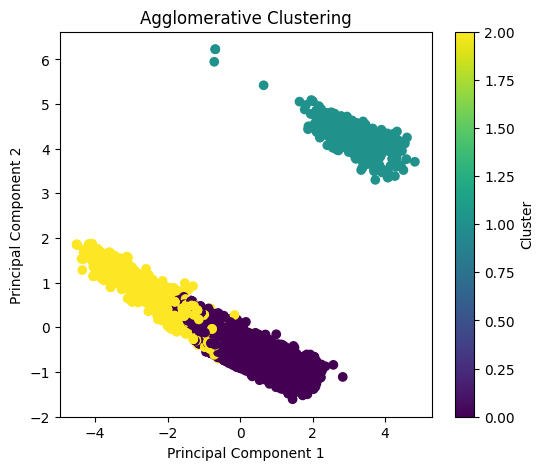

In [122]:
num_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = agg_clustering.fit_predict(data_scaled)

tmp_merged_df['Cluster'] = cluster_labels

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

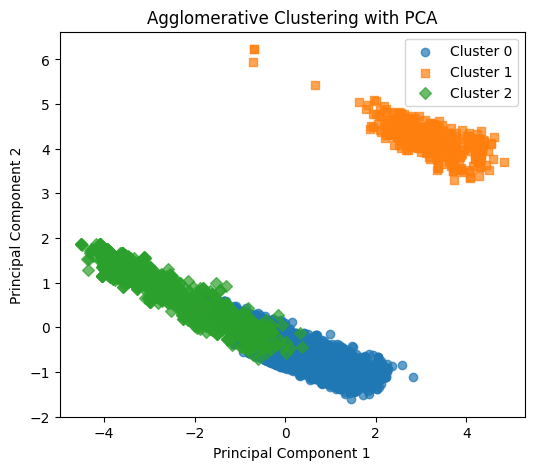

In [123]:
markers = ['o', 's', 'D']

plt.figure(figsize=(6, 5))

for cluster in range(num_clusters):
    cluster_data = data_pca[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
                marker=markers[cluster], 
                label=f'Cluster {cluster}',
                alpha=0.7)

plt.title('Agglomerative Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

tmp_merged_df.to_csv('agg_clustered_data.csv', index=False)

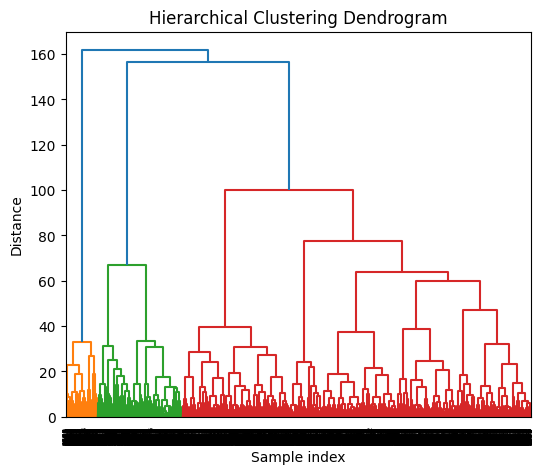

In [124]:
Z = linkage(data_scaled, method='ward')

plt.figure(figsize=(6, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

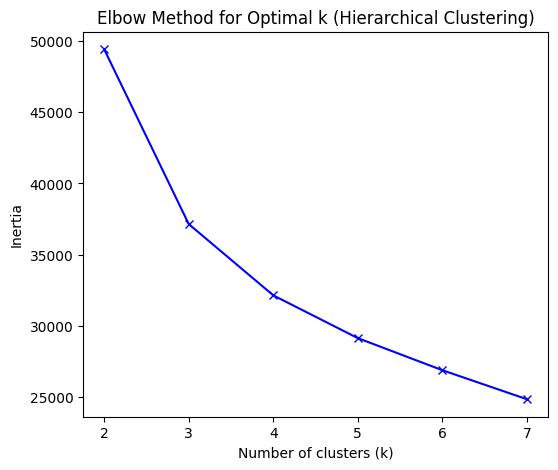

In [125]:
def compute_inertia(data_scaled, Z, num_clusters):
    cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')
    inertia = 0
    for i in range(1, num_clusters + 1):
        cluster_points = data_scaled[cluster_labels == i]
        if len(cluster_points) > 0:
            centroid = np.mean(cluster_points, axis=0)
            inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia

inertia = []
K = range(2, 8)
for k in K:
    inertia.append(compute_inertia(data_scaled, Z, k))

plt.figure(figsize=(6, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Hierarchical Clustering)')
plt.show()

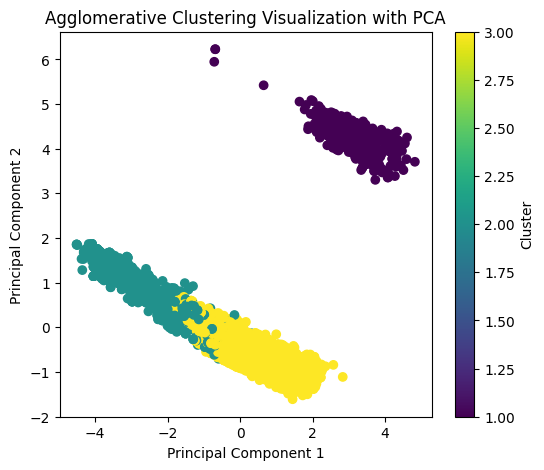

In [126]:
max_d = 110 
cluster_labels = fcluster(Z, max_d, criterion='distance')

tmp_merged_df['Cluster'] = cluster_labels

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('Agglomerative Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

tmp_merged_df.to_csv('agg_clustered_data.csv', index=False)


Cluster Profiling:
|   Cluster |   Rating Count |   Last update |   Rating |   Released |   Price |         Installs |        Size |   Reviews |   Type |   In app purchases |
|----------:|---------------:|--------------:|---------:|-----------:|--------:|-----------------:|------------:|----------:|-------:|-------------------:|
|         1 |        96153.1 |       2018.96 |  4.22921 |    2014.42 | 0.37354 | 698896           | 1.65525e+07 |   14360.3 |      1 |           0.205069 |
|         2 |       814530   |       2020.31 |  4.29623 |    2014.48 | 0       |      3.67269e+07 | 2.46662e+07 |  438963   |      0 |           0.544658 |
|         3 |       155054   |       2019.54 |  4.21895 |    2015.67 | 0       |      3.13101e+06 | 1.87197e+07 |   47433   |      0 |           0.317715 |


c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Feature Importance:
            Feature  Importance
5          Installs    0.390982
7           Reviews    0.238387
4             Price    0.154572
8              Type    0.133877
0      Rating Count    0.056681
2            Rating    0.007807
6              Size    0.006008
3          Released    0.005749
1       Last update    0.003261
9  In app purchases    0.002676


C:\Users\mashadservice\AppData\Local\Temp\ipykernel_16328\3907552875.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:525: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/

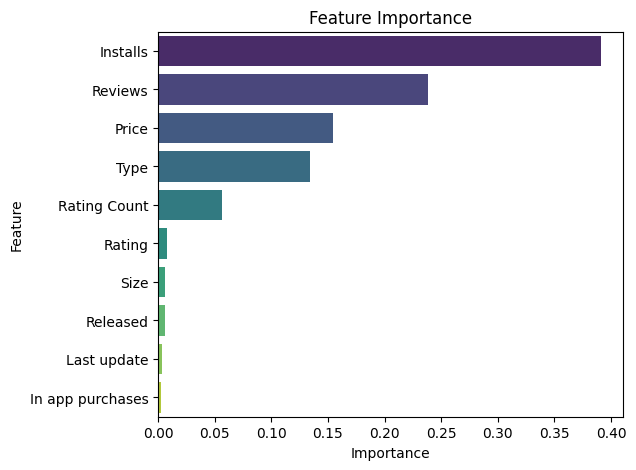

c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Silhouette Score (Overall): 0.13


c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\mashadservice\AppData\Local\Temp\ipykernel_16328\3907552875.py:44: RuntimeWarning: Mean of empty slice.
  cluster_avg_silhouette = ith_cluster_silhouette_values.mean()
c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


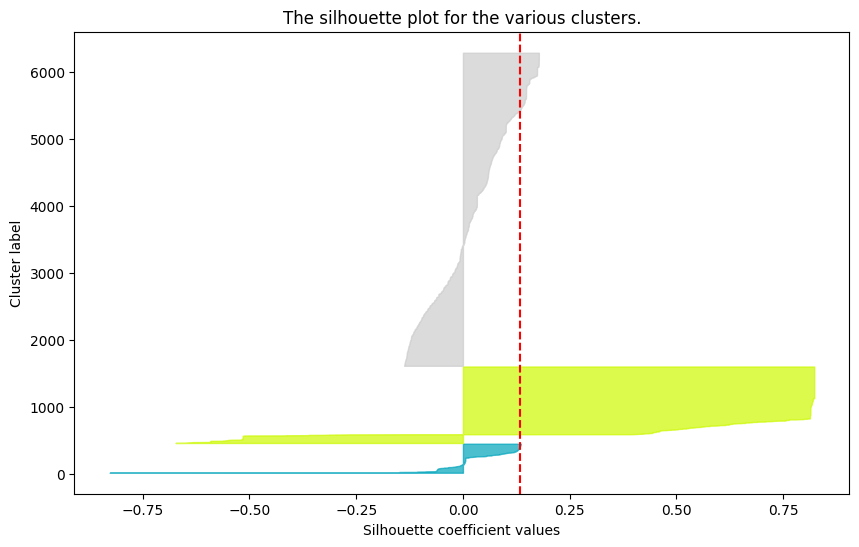

Average Silhouette Scores for each cluster:
Cluster 0: nan
Cluster 1: 0.03
Cluster 2: 0.62
Cluster 3: 0.03
Cluster 4: nan
Cluster 5: nan
Cluster 6: nan


In [127]:
# Analyze Clusters
# Cluster Profiling
cluster_profile = tmp_merged_df.groupby('Cluster').mean()
print("Cluster Profiling:")
print(cluster_profile.to_markdown())

# Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(tmp_merged_df.drop('Cluster', axis=1), tmp_merged_df['Cluster'])
feature_importance = pd.DataFrame({'Feature': tmp_merged_df.columns[:-1], 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

plt.figure(figsize=(6, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.show()

# Silhouette Analysis
# average silhouette score for the entire dataset
silhouette_avg = silhouette_score(tmp_merged_df.drop('Cluster', axis=1), tmp_merged_df['Cluster'])
print(f'Silhouette Score (Overall): {silhouette_avg:.2f}')

# silhouette values for each sample
silhouette_values = silhouette_samples(tmp_merged_df.drop('Cluster', axis=1), tmp_merged_df['Cluster'])

plt.figure(figsize=(10, 6))
y_lower = 10

cluster_avg_silhouettes = []

for i in range(kmeans.n_clusters):
    ith_cluster_silhouette_values = silhouette_values[tmp_merged_df['Cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / num_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # average silhouette score for the current cluster
    cluster_avg_silhouette = ith_cluster_silhouette_values.mean()
    cluster_avg_silhouettes.append((i, cluster_avg_silhouette))

    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("The silhouette plot for the various clusters.")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()

print("Average Silhouette Scores for each cluster:")
for cluster, avg_silhouette in cluster_avg_silhouettes:
    print(f"Cluster {cluster}: {avg_silhouette:.2f}")

In [128]:
del tmp_merged_df

### Part 3 - Classification

In [129]:
features = merged_df[['Rating Count', 'Reviews', 'Minimum Installs', 'Installs', 'Size', 'Type']]
features['Type'] = features['Type'].map({'Free': 0, 'Paid': 1})
target = categorical_rating
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'Naive Bayes': GaussianNB()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    print(f'{model_name}:')
    print(f'  Accuracy: {accuracy:.2f}')
    print(f'  Precision: {precision:.2f}')
    print(f'  Recall: {recall:.2f}')
    print(f'  F1 Score: {f1:.2f}')
    print('-' * 30)


Decision Tree:
  Accuracy: 0.82
  Precision: 0.81
  Recall: 0.82
  F1 Score: 0.81
------------------------------


C:\Users\mashadservice\AppData\Local\Temp\ipykernel_16328\1215087204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Type'] = features['Type'].map({'Free': 0, 'Paid': 1})
c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_ty

Random Forest:
  Accuracy: 0.85
  Precision: 0.84
  Recall: 0.85
  F1 Score: 0.83
------------------------------
Logistic Regression:
  Accuracy: 0.82
  Precision: 0.72
  Recall: 0.82
  F1 Score: 0.74
------------------------------
Support Vector Classifier:
  Accuracy: 0.82
  Precision: 0.68
  Recall: 0.82
  F1 Score: 0.74
------------------------------
Naive Bayes:
  Accuracy: 0.76
  Precision: 0.74
  Recall: 0.76
  F1 Score: 0.75
------------------------------


c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
c:\Users\mashadservice\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/dev